### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

datos_tiendas = [tienda, tienda2, tienda3, tienda4]

In [ ]:
#!pip install matplotlib
import matplotlib.pyplot as plt
import numpy as np

#1. Análisis de facturación



In [ ]:
def ingreso_total(datos):
  return sum(datos['Precio']) / 1000000

def ingreso_total_por_tienda():
  return {f'{i + 1}': ingreso_total(datos_tienda) for i, datos_tienda in enumerate(datos_tiendas)}

def grafico_ingreso_total_por_tienda():
  tiendas, ingresos_totales = list(zip(*ingreso_total_por_tienda().items()))
  fig, ax = plt.subplots()
  bar_container = ax.bar(tiendas, ingresos_totales, color = "#91DCEA")
  ax.bar_label(bar_container, fmt='%.2f')
  ax.set_ylim(1e3, 1.2 * 1e3)
  ax.set_ylabel('Ingreso total')
  ax.set_xlabel('Tiendas')
  plt.show()

# 2. Ventas por categoría

In [ ]:
categorias_unicas = list(set(datos_tiendas[0]['Categoría del Producto']))

def ventas_por_categoria(datos, categoria_unica):
  return sum([precio for categoria, precio in zip(datos['Categoría del Producto'], datos['Precio']) if categoria == categoria_unica])

def venta_total_por_categoria(datos):
  return {categoria_unica: round(ventas_por_categoria(datos, categoria_unica) / 1000000, 2) for categoria_unica in categorias_unicas}

def ventas_categorias_por_tienda():
  return {f'{i + 1}': venta_total_por_categoria(datos_tienda) for i, datos_tienda in enumerate(datos_tiendas)}

def grafico_ventas_categorias_por_tienda():
  fig, ax = plt.subplots(2,2, figsize = (16,8))
  grafico_pie_por_tienda(ax, 0, 0, '1')
  grafico_pie_por_tienda(ax, 0, 1, '2')
  grafico_pie_por_tienda(ax, 1, 0, '3')
  grafico_pie_por_tienda(ax, 1, 1, '4')
  plt.show()

def grafico_pie_por_tienda(ax, fila, columna, campo):
  colores = ["#E6A8A8", "#D8BFD8", "#A2C4C9", "#B4A7D6", "#A9CCE3", "#A3E4D7", "#F7C59F", "#FFD28F"]
  labels = [f'{categoria} ({venta})' for categoria, venta in ventas_categorias_por_tienda()[campo].items()]
  datos = list(ventas_categorias_por_tienda()[campo].values())
  ax[fila, columna].set_title(f'Tienda {campo}', fontdict={'fontsize': 12})
  wedges, texts = ax[fila, columna].pie(datos, wedgeprops=dict(width=0.5), colors = colores)
  bbox_props = dict(boxstyle="square, pad=0", fc="w", ec="k", lw=0)
  kw = dict(arrowprops=dict(arrowstyle="-"),
            bbox=bbox_props, zorder=0, va="center")

  for i, p in enumerate(wedges):
      ang = (p.theta2 - p.theta1)/2. + p.theta1
      y = np.sin(np.deg2rad(ang))
      x = np.cos(np.deg2rad(ang))
      horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
      connectionstyle = f"angle,angleA=0,angleB={ang}"
      kw["arrowprops"].update({"connectionstyle": connectionstyle})
      ax[fila, columna].annotate(labels[i], xy=(x, y), xytext=(1.25*np.sign(x), 1.2*y), horizontalalignment=horizontalalignment, **kw)

# 3. Calificación promedio de la tienda


In [ ]:
def calificacion_promedio(datos):
  return round(sum(datos['Calificación']) / len(datos['Calificación']), 2);

def calificacion_promedio_por_tienda():
  return {f'{i + 1}': calificacion_promedio(datos_tienda) for i, datos_tienda in enumerate(datos_tiendas)}

def grafico_calificacion_promedio_por_tienda():
  tiendas, promedios = list(zip(*calificacion_promedio_por_tienda().items()))

  fig, ax = plt.subplots()
  bar_container = ax.bar(tiendas, promedios, color = "#F9D23C", linewidth = 2)
  ax.bar_label(bar_container, fmt='%.2f')
  ax.set_ylim(3.9, 4.1)
  ax.set_ylabel('Calificación promedio')
  ax.set_xlabel('Tiendas')
  plt.show()

# 4. Productos más y menos vendidos

In [ ]:
productos_unicos = list(set(datos_tiendas[0]['Producto']))

def ventas_por_producto(datos, producto_unico):
  return [precio for producto, precio in zip(datos['Producto'], datos['Precio']) if producto == producto_unico]

def venta_total_por_producto(datos):
  return {producto_unico: round(sum(ventas_por_producto(datos, producto_unico))/1000000, 2) for producto_unico in productos_unicos}

def ventas_productos_por_tienda():
  return {f'{i + 1}': dict(sorted(venta_total_por_producto(datos_tienda).items(), key = lambda item: item[1], reverse=True)) for i, datos_tienda in enumerate(datos_tiendas)}

def grafico_ventas_productos_por_tienda(tipo = " "):
  fig, ax = plt.subplots(2,2,figsize = (24,8))
  plt.suptitle("5 productos" + tipo + "vendidos por tienda (en millones)", fontsize = 12, fontweight = 'bold')
  grafico_barrah_por_tienda(ax, 0, 0, '1', "#E6A8A8", tipo)
  grafico_barrah_por_tienda(ax, 0, 1, '2', "#D8BFD8", tipo)
  grafico_barrah_por_tienda(ax, 1, 0, '3', "#A2C4C9", tipo)
  grafico_barrah_por_tienda(ax, 1, 1, '4', "#B4A7D6", tipo)
  plt.show()

def grafico_barrah_por_tienda(ax, fila, columna, campo, color, tipo):
  datos = ventas_productos_por_tienda()[campo]
  labels = list(datos.keys())
  datos = list(datos.values())
  if tipo.strip() == "menos":
    labels = labels[-5:]
    datos = datos[-5:]
  elif tipo.strip() == "más":
    labels = labels[:5]
    datos = datos[:5]
  ax[fila, columna].set_title(f'Tienda {campo}', fontdict={'fontsize': 12})
  hbars = ax[fila, columna].barh(labels, datos, color = color)
  ax[fila, columna].bar_label(hbars, fmt='%.2f')

# 5. Envío promedio por tienda

In [ ]:
def envio_promedio(datos):
  return sum(datos['Costo de envío']) / len(datos['Costo de envío']) / 1000;

def envio_promedio_por_tienda():
  return {f'{i + 1}': envio_promedio(datos_tienda) for i, datos_tienda in enumerate(datos_tiendas)}

def grafico_envio_promedio_por_tienda():
  tiendas, promedios = list(zip(*envio_promedio_por_tienda().items()))

  fig, ax = plt.subplots()
  bar_container = ax.bar(tiendas, promedios, color = "#5FBB68", linewidth = 2)
  ax.bar_label(bar_container, fmt='%.2f')
  ax.set_ylim(23, 26.5)
  ax.set_ylabel('Costo de envío promedio')
  ax.set_xlabel('Tiendas')
  plt.show()

# Informe Final
---


## 1. Introducción

El presente informe tiene como propósito evaluar el rendimiento de las cuatro sucursales de Alura Store con el fin de determinar cuál de ellas resulta menos eficiente y, por tanto, debería ser vendida para destinar los recursos a un nuevo proyecto de emprendimiento. Para ello, se examinan cinco factores clave: los ingresos totales, las categorías de productos más y menos vendidas, las calificaciones promedio de los clientes, los productos más y menos vendidos, y los costos de envío promedio. A continuación se presentan los hallazgos, apoyados en las visualizaciones correspondientes, y se formula la recomendación final.

## 2. Desarrollo

### 2.1 Ingresos totales

**Gráfico 1**

*Distribución del ingreso total en millones según la tienda*

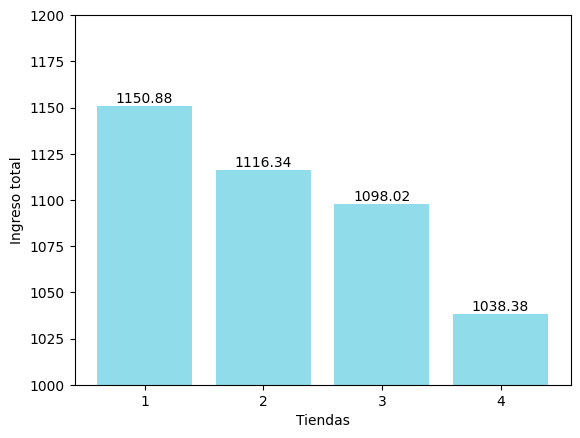

In [ ]:
grafico_ingreso_total_por_tienda()

El Gráfico 1 muestra que la Tienda 1 registra el mayor ingreso total, con 1150,88 millones, seguida de la Tienda 2 (1116,34) y la Tienda 3 (1098,02). En contraste, la Tienda 4 presenta el ingreso más bajo, con 1038,38 millones, lo que representa un 9,78% menos que la Tienda 1.

### 2.2 Categorías de productos más y menos vendidas

**Gráfico 2**

*Distribución de las ventas de las categorias de productos en millones según la tienda*

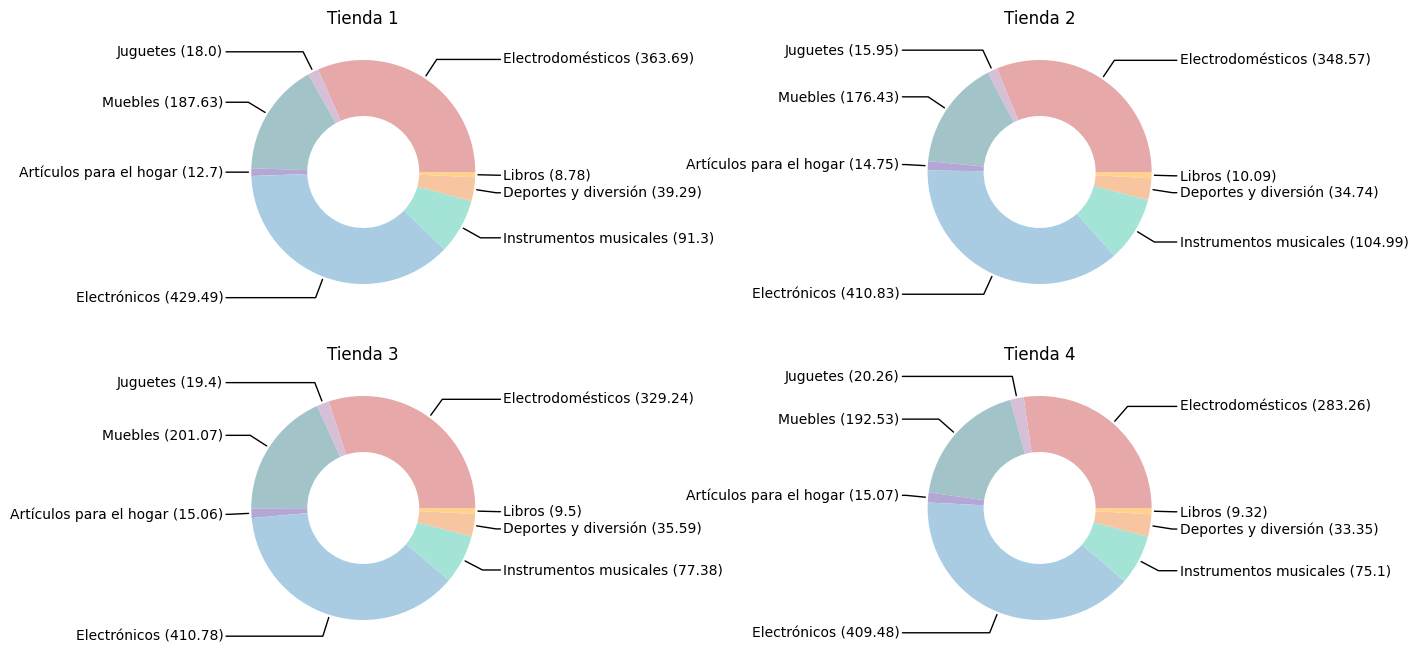

In [ ]:
grafico_ventas_categorias_por_tienda()

Según el Gráfico 2, la categoría de Electrónicos es la más vendida en todas las tiendas. Dentro de esta categoría, la Tienda 1 lidera con 429,49 millones, seguida de cerca por la Tienda 2 (410,83), la Tienda 3 (410,78) y la Tienda 4 (409,48). En cuanto a la categoría menos vendida, los Libros ocupan la última posición. Para esta categoría, la Tienda 2 encabeza las ventas con 10,09 millones, seguida por la Tienda 3 (9,5), la Tienda 4 (9,32) y finalmente la Tienda 1 con 8,78 millones.

### 2.3 Calificaciones promedio de los clientes

**Gráfico 3**

*Distribución de la calificación promedio de los clientes según la tienda*

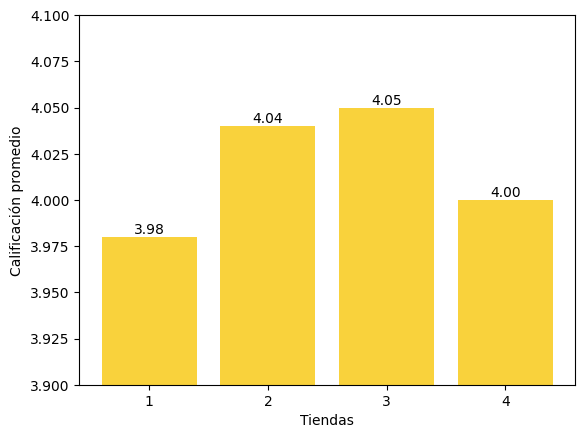

In [ ]:
grafico_calificacion_promedio_por_tienda()

El Gráfico 3 revela que la Tienda 3 posee la mejor calificación promedio con 4,05, seguida muy de cerca por la Tienda 2 (4,04) y la Tienda 4 (4,00). Por otro lado, la Tienda 1 registra la calificación más baja con 3,98, lo que representa un 1,73% menos que la mejor calificación obtenida por la Tienda 3.

### 2.4 Productos más y menos vendidos

**Gráfico 4**

*Distribución de la venta de los 5 productos más vendidos en millones según la tienda*

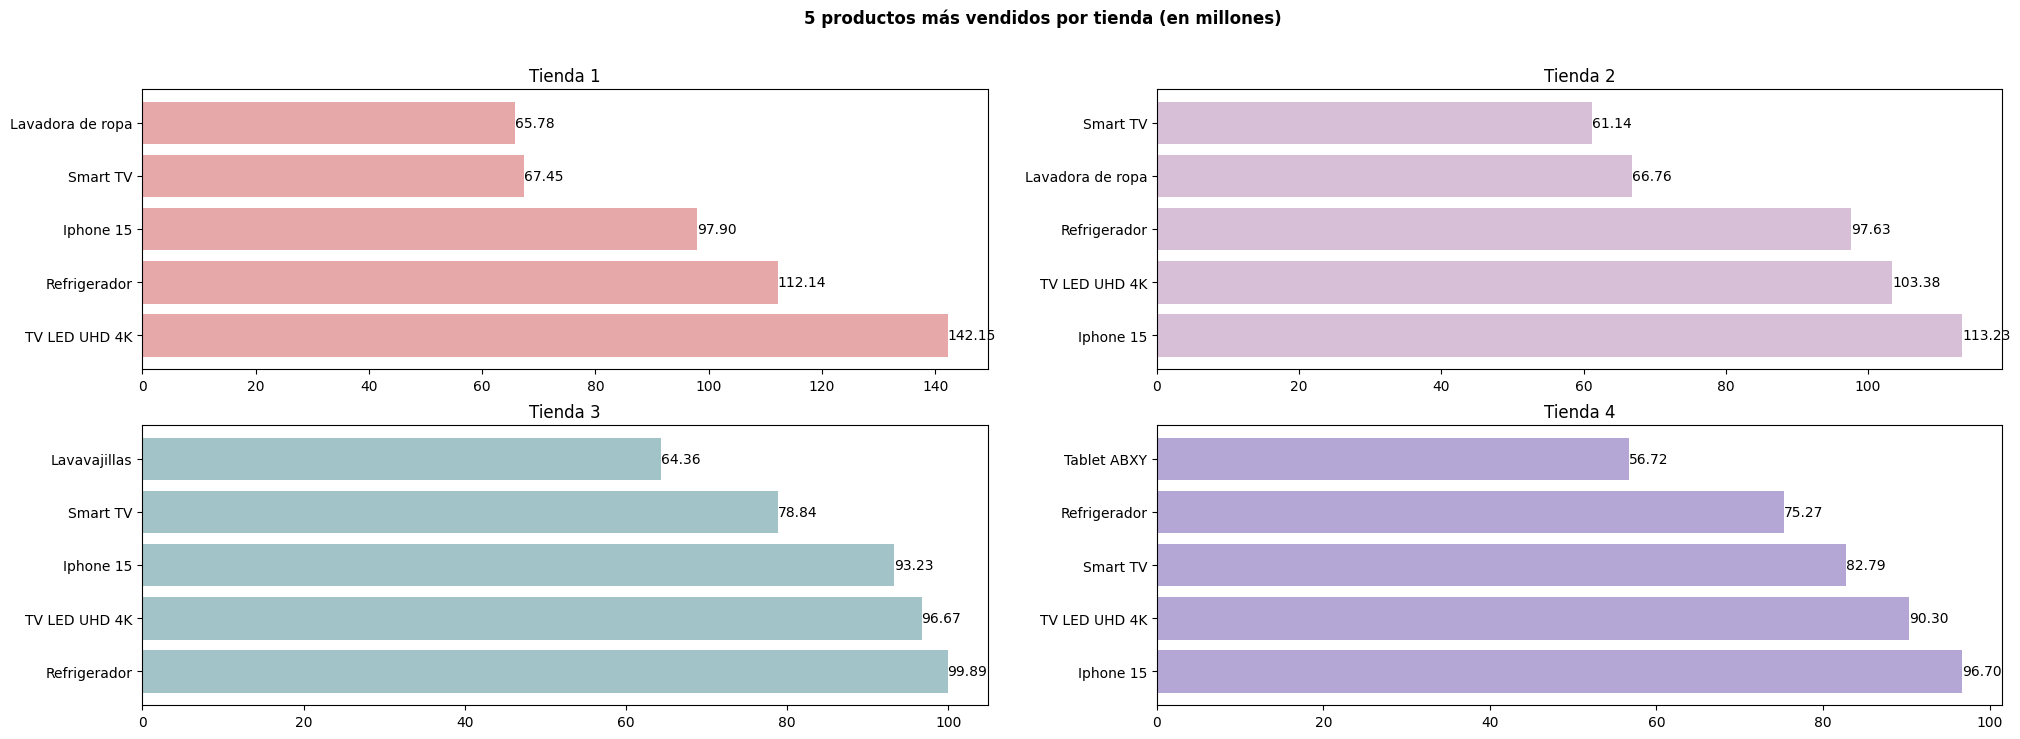

In [ ]:
grafico_ventas_productos_por_tienda(" más ")

En el Gráfico 4 se identifican como productos más vendidos el iPhone 15, el TV LED UHD 4K y el Refrigerador. En este grupo, la Tienda 1 lidera con una venta total de 142,15 millones, seguida por la Tienda 2 (113,23) y la Tienda 3 (99,89). La Tienda 4 nuevamente ocupa la última posición con 96,70 millones, lo que equivale a un 31,97 % menos en comparación con la Tienda 1.

**Gráfico 5**

*Distribución de la venta de los 5 productos menos vendidos en millones según la tienda*

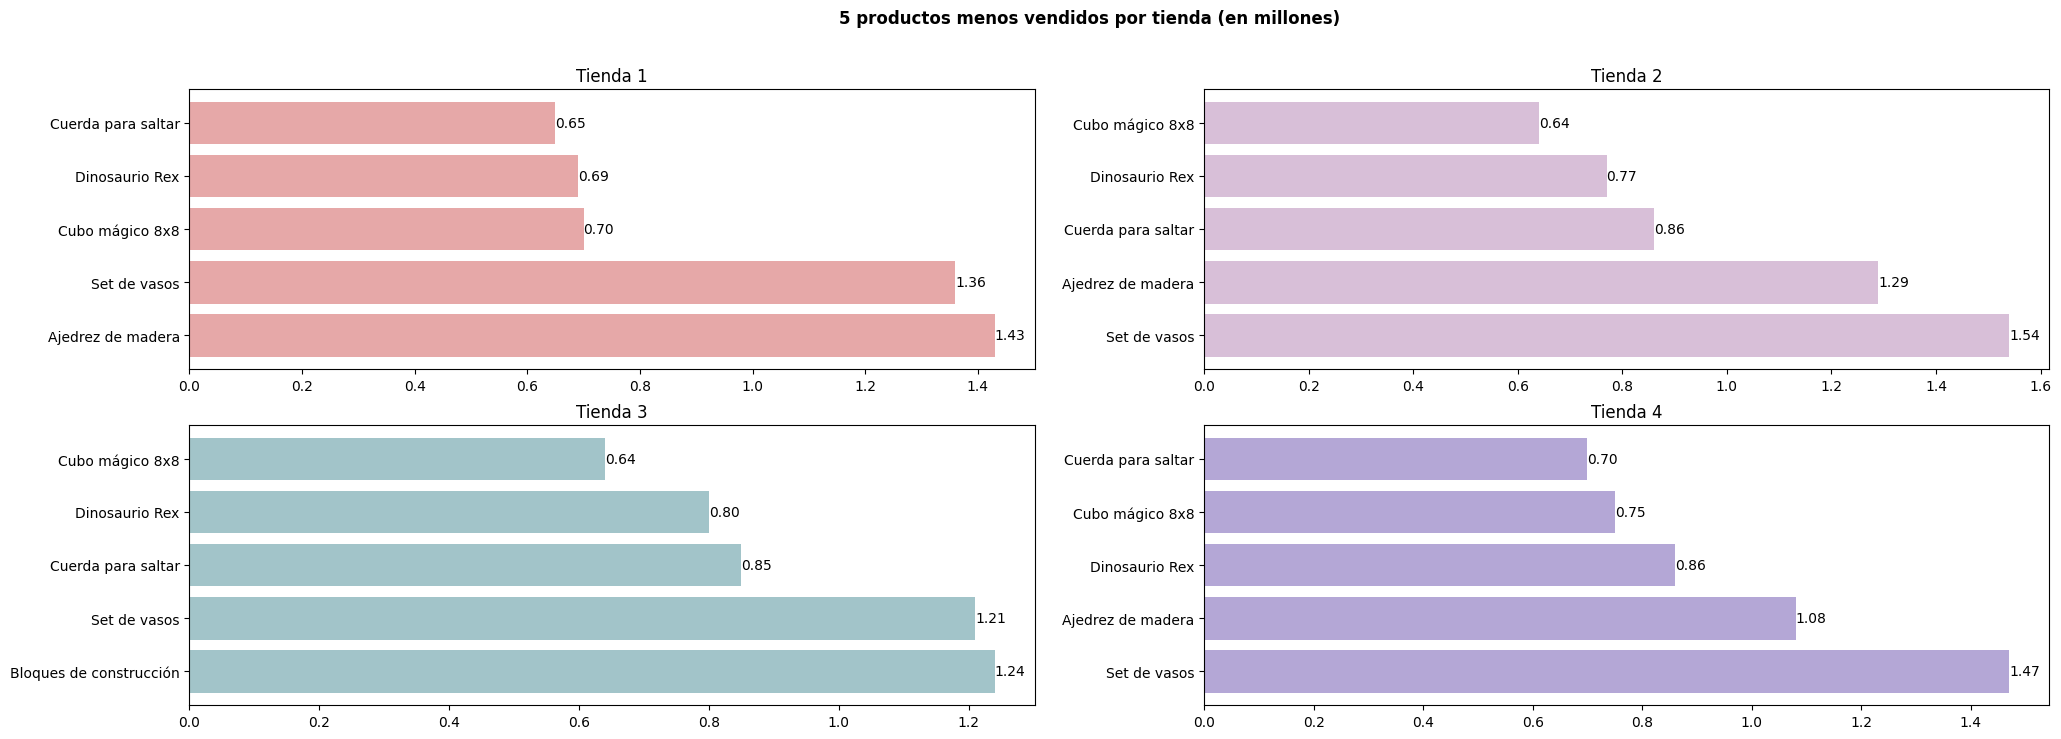

In [ ]:
grafico_ventas_productos_por_tienda(" menos ")

El Gráfico 5 muestra que los productos menos vendidos son la cuerda para saltar y el cubo mágico 8x8. En este caso, la Tienda 4 presenta la venta más alta con 0,70 millones, seguida por las Tiendas 2 y 3 (ambas con 0,64). La Tienda 1 registra la menor venta con 0,65 millones, un 7,14 % inferior respecto a la Tienda 4.

### 2.5 Coste de envío promedio

**Gráfico 6**

*Distribución del costo de envío promedio en miles según la tienda*

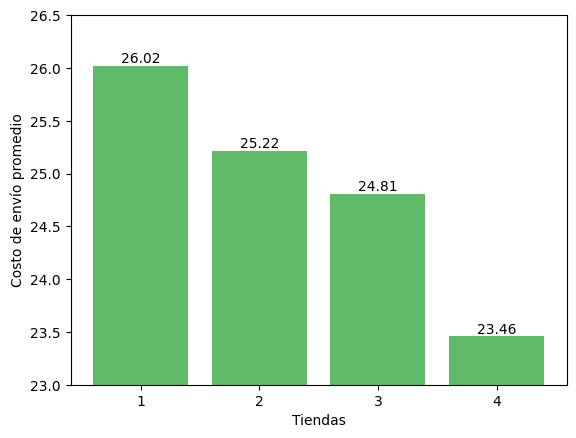

In [ ]:
grafico_envio_promedio_por_tienda()

De acuerdo con el Gráfico 6, la Tienda 1 tiene el mayor costo de envío promedio con 26,02 mil, seguida por la Tienda 2 (25,22) y la Tienda 3 (24,81). En contraste, la Tienda 4 registra el menor costo con 23,46 mil, lo que representa un 9,84 % menos que el costo de envío de la Tienda 1.

## 3. Conclusión

Tras sintetizar los hallazgos de todos los gráficos, queda claro que la Tienda 4 es la candidata más débil para mantener en la cadena Alura Store. Aunque exhibe la ventaja de tener el coste de envío promedio más bajo, siendo 9,84 % menor a la Tienda 1, esta eficiencia logística no compensa sus deficiencias en los indicadores comerciales y de satisfacción:

* Ingresos totales (Gráfico 1): es la que menos recauda con un 9,78 % inferior a la Tienda 1.

* Ventas de categorias de producto más vendidas (Gráfico 2): ocupa la última posición, con 409,48 M frente a los 429,49 M de la Tienda 1.

* Calificación promedio (Gráfico 3): obtiene 4,00, superando apenas a la Tienda 1 pero quedando detrás de la Tienda 2 y la Tienda 3.

* Ventas de productos más vendidos (Gráfico 4): vuelve a ocupar la última posición con el iPhone 15, teniendo 31,97 % menos que la Tienda 1.

En contraste, la Tienda 1 se distingue por liderar en ingresos, ventas de electrónicos y productos más vendidos, a pesar de su calificación y coste de envío elevados; la Tienda 2 combina buen nivel de ventas con una buena calificación; y la Tienda 3 se beneficia de la mejor valoración de clientes y un desempeño de ventas equilibrado. Por tanto, la Tienda 4 presenta la combinación más desfavorable de bajo ingreso, ventas reducidas en categorías clave y una satisfacción de cliente sólo moderada. Recomendamos al Sr. Juan proceder con la venta de la Tienda 4, pues al liberarse de esta sucursal de menor rendimiento podrá destinar recursos a nuevas oportunidades sin comprometer el desempeño global de Alura Store.